In [111]:
import keras as ks

#Preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image

#modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve

import matplotlib.pyplot as plt

In [138]:

import pandas as pd
import numpy as np

import cv2
from cv2 import imread, imshow, IMREAD_GRAYSCALE

## Newest Iteration

In [222]:
train_directory = '../text-recognition/2_train_balanced'
test_directory = '../text-recognition/2_test_balanced'

In [270]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        #classes = labels_list, 
        batch_size= 24095)

Found 19183 images belonging to 78 classes.


In [271]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_directory,
        color_mode = 'grayscale',
        target_size= (64, 64),
        class_mode = 'categorical',
       # classes = labels_list,
        batch_size= 2674)

Found 2125 images belonging to 78 classes.


In [229]:
class_dictionary = train_generator.class_indices
labels = {v: k for k, v in class_dictionary.items()}
labels_list = [words for words in labels.values()]
labels_list

['I',
 'a',
 'about',
 'all',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'been',
 'being',
 'but',
 'by',
 'can',
 'could',
 'first',
 'for',
 'from',
 'had',
 'has',
 'have',
 'he',
 'her',
 'him',
 'his',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'like',
 'made',
 'man',
 'may',
 'me',
 'more',
 'much',
 'new',
 'no',
 'not',
 'of',
 'on',
 'one',
 'only',
 'or',
 'other',
 'out',
 'over',
 'said',
 'she',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'there',
 'they',
 'this',
 'time',
 'to',
 'two',
 'up',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'would',
 'you']

In [272]:
train_data, train_labels = next(train_generator)
test_data, test_labels = next(test_generator)

In [273]:
print('training: {}'.format(train_data.shape))

print('testing: {}'.format(test_data.shape))

training: (19183, 64, 64, 1)
testing: (2125, 64, 64, 1)


In [269]:
19183 + 2125

21308

In [255]:
train_generator.class_indices

{'I': 0,
 'a': 1,
 'about': 2,
 'all': 3,
 'an': 4,
 'and': 5,
 'are': 6,
 'as': 7,
 'at': 8,
 'be': 9,
 'been': 10,
 'being': 11,
 'but': 12,
 'by': 13,
 'can': 14,
 'could': 15,
 'first': 16,
 'for': 17,
 'from': 18,
 'had': 19,
 'has': 20,
 'have': 21,
 'he': 22,
 'her': 23,
 'him': 24,
 'his': 25,
 'if': 26,
 'in': 27,
 'into': 28,
 'is': 29,
 'it': 30,
 'its': 31,
 'like': 32,
 'made': 33,
 'man': 34,
 'may': 35,
 'me': 36,
 'more': 37,
 'much': 38,
 'new': 39,
 'no': 40,
 'not': 41,
 'of': 42,
 'on': 43,
 'one': 44,
 'only': 45,
 'or': 46,
 'other': 47,
 'out': 48,
 'over': 49,
 'said': 50,
 'she': 51,
 'so': 52,
 'some': 53,
 'than': 54,
 'that': 55,
 'the': 56,
 'their': 57,
 'them': 58,
 'there': 59,
 'they': 60,
 'this': 61,
 'time': 62,
 'to': 63,
 'two': 64,
 'up': 65,
 'very': 66,
 'was': 67,
 'we': 68,
 'were': 69,
 'what': 70,
 'when': 71,
 'which': 72,
 'who': 73,
 'will': 74,
 'with': 75,
 'would': 76,
 'you': 77}

###  Building CNN Framework

In [274]:
model = Sequential()
#The first convolution
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(2, 2))

# # The second convolution
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#The third convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#The fourth convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# #The fifth convolution
# model.add(Convolution2D(128, (1, 1), activation='relu'))  
# model.add(MaxPooling2D(2,2))


# Flatten the results to feed into a dense layer
model.add(Flatten())
          
# 128 neurons in the fully-connected layer
model.add(Dense(128, activation='relu'))
          
# 147 output neurons for 147 classes with the softmax activation
model.add(Dense(78, activation='softmax'))

In [275]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

In [276]:
x_val = train_data[:2100]
partial_x_train = train_data[2100:]

y_val = train_labels[:2100]
partial_y_train = train_labels[2100:]

In [277]:
partial_x_train.shape

(17083, 64, 64, 1)

In [279]:
cnn_4 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=70,
                    batch_size= 341,
                    validation_data=(x_val, y_val))

Train on 17083 samples, validate on 2100 samples
Epoch 1/70
17083/17083 [==============================] - 36s 2ms/step - loss: 4.2251 - accuracy: 0.0368 - val_loss: 4.1340 - val_accuracy: 0.0462
Epoch 2/70
17083/17083 [==============================] - 36s 2ms/step - loss: 3.5629 - accuracy: 0.1522 - val_loss: 2.9245 - val_accuracy: 0.2271
Epoch 3/70
17083/17083 [==============================] - 35s 2ms/step - loss: 2.5647 - accuracy: 0.3022 - val_loss: 2.3682 - val_accuracy: 0.3448
Epoch 4/70
17083/17083 [==============================] - 34s 2ms/step - loss: 2.1426 - accuracy: 0.3968 - val_loss: 2.0795 - val_accuracy: 0.4190
Epoch 5/70
17083/17083 [==============================] - 34s 2ms/step - loss: 1.9290 - accuracy: 0.4521 - val_loss: 1.9478 - val_accuracy: 0.4543
Epoch 6/70
17083/17083 [==============================] - 34s 2ms/step - loss: 1.7549 - accuracy: 0.4928 - val_loss: 1.7337 - val_accuracy: 0.5095
Epoch 7/70
17083/17083 [==============================] - 34s 2ms/ste

In [282]:
#Take1 - 73%, saved as: model.save('rebalance1.h5')
model.save('78%-2-Balanced.h5')

In [280]:
score = model.evaluate(test_data, test_labels)
print('model score: {}'.format(score))

2125/2125 [==============================] - 1s 674us/step
model score: [1.1826948523801917, 0.7872940897941589]


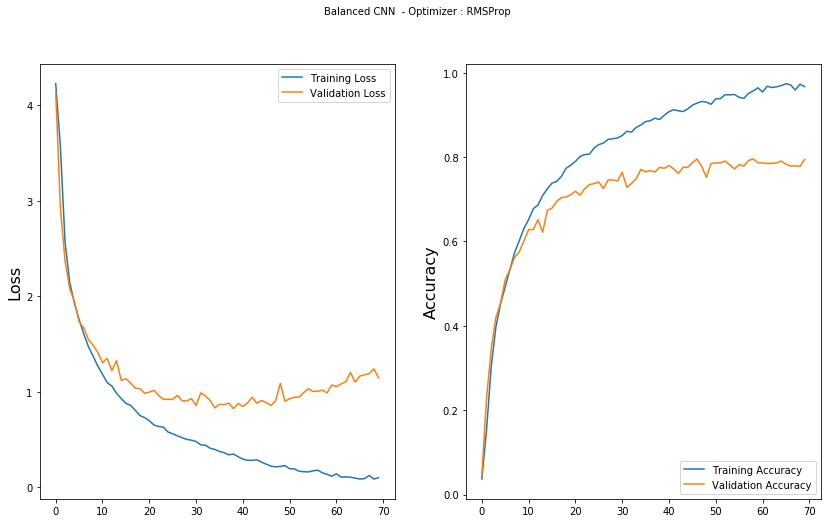

In [294]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.suptitle('Balanced CNN  - Optimizer : RMSProp', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(cnn_4.history['loss'], label='Training Loss')
plt.plot(cnn_4.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(cnn_4.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_4.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.savefig('78%-2-BalancedCNN.png', bbox_inches  = 'tight')

In [291]:
# #predictions = model.predict(test_data)
# predictions = np.around(predictions)
# f1_score = f1_score(test_labels, predictions, average='micro')
# print('f1 score: {}'.format(f1_score))

TypeError: 'numpy.float64' object is not callable